# **Sentiment Analysis of Customer Reviews for Product Improvement**

---


What This Project is About

In this project, we’re diving into the world of customer reviews from e-commerce sites.

The goal is simple: understand what customers are really saying about a product. By analyzing their feedback, we’ll be able to see what they love, what needs work, and how companies can make their products even better. Think of it as listening to customers on a deeper level, using data to uncover the emotions behind their words.


---



Why This Matters

When a product is launched on e-commerce platforms, the first wave of customer feedback is incredibly important. These reviews offer a glimpse into how well the product is being received. By analyzing these reviews, we can gather valuable insights into what customers think and feel. This helps businesses tweak and improve their products, making sure they’re meeting customer needs and expectations.


---


What We’ll Be Using:

*   Language: Python
*   Libraries:Textblob ,Numpy, Pandas ,Seaborn Wordcloud &  Matplotlib
*   Data Source : Kaggle(Amazon Product Reviews).
*   Platform: Google  Colab



---


What We Hope to Achieve


By the end of this project, we’ll have a clear picture of the sentiments behind customer reviews—whether they’re positive, negative, or somewhere in between. This will help us understand how customers really feel about a product and what can be done to improve their experience.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
df = pd.read_csv('amazon.csv')
print(df.head().T)

                                                                     0  \
product_id                                                  B07JW9H4J1   
product_name         Wayona Nylon Braided USB to Lightning Fast Cha...   
category             Computers&Accessories|Accessories&Peripherals|...   
discounted_price                                                  ₹399   
actual_price                                                    ₹1,099   
discount_percentage                                                64%   
rating                                                             4.2   
rating_count                                                    24,269   
about_product        High Compatibility : Compatible With iPhone 12...   
user_id              AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
user_name            Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
review_id            R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
review_title         Satisfied,Chargin

In [ ]:


initial_rows = df.shape[0]
initial_columns = df.shape[1]
print(f"Initial number of rows: {initial_rows}")
print(f"Initial number of columns: {initial_columns}")

essential_columns = ['product_id', 'rating', 'rating_count', 'review_content', 'review_title']

df_cleaned = df[essential_columns].dropna().drop_duplicates()

# Check the number of rows after cleaning
final_rows = df_cleaned.shape[0]
print(f"Final number of rows after cleaning: {final_rows}")

# Display DataFrame info after cleaning
df_cleaned.info()

# Calculate and print the number of rows dropped
rows_dropped = initial_rows - final_rows
print(f"Number of rows dropped: {rows_dropped}")

# Preview cleaned data
print(df_cleaned.head())


Initial number of rows: 1465
Initial number of columns: 16
Final number of rows after cleaning: 1393
<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1464
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      1393 non-null   object
 1   rating          1393 non-null   object
 2   rating_count    1393 non-null   object
 3   review_content  1393 non-null   object
 4   review_title    1393 non-null   object
dtypes: object(5)
memory usage: 65.3+ KB
Number of rows dropped: 72
   product_id rating rating_count  \
0  B07JW9H4J1    4.2       24,269   
1  B098NS6PVG    4.0       43,994   
2  B096MSW6CT    3.9        7,928   
3  B08HDJ86NZ    4.2       94,363   
4  B08CF3B7N1    4.2       16,905   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy

In [ ]:
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity
df['sentiment'] = df['review_content'].apply(get_sentiment)
print(df[['product_id', 'review_content', 'sentiment']].head())

   product_id                                     review_content  sentiment
0  B07JW9H4J1  Looks durable Charging is fine tooNo complains...   0.481944
1  B098NS6PVG  I ordered this cable to connect my phone to An...   0.274318
2  B096MSW6CT  Not quite durable and sturdy,https://m.media-a...   0.600000
3  B08HDJ86NZ  Good product,long wire,Charges good,Nice,I bou...   0.240370
4  B08CF3B7N1  Bought this instead of original apple, does th...   0.262740


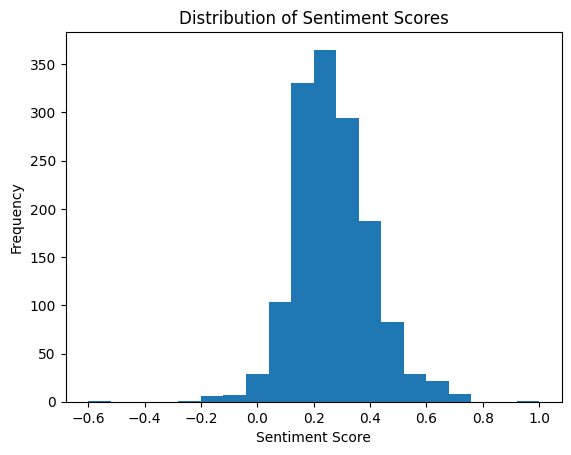

In [ ]:
plt.hist(df['sentiment'], bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
avg_sentiment_by_product = df.groupby('product_id')['sentiment'].mean().reset_index()
df_final = pd.merge(df_cleaned, avg_sentiment_by_product, on='product_id', how='left')
print(df_final.head())

   product_id rating rating_count  \
0  B07JW9H4J1    4.2       24,269   
1  B098NS6PVG    4.0       43,994   
2  B096MSW6CT    3.9        7,928   
3  B08HDJ86NZ    4.2       94,363   
4  B08CF3B7N1    4.2       16,905   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                        review_title  sentiment  
0  Satisfied,Charging is really fast,Value for mo...   0.481944  
1  A Good Braided Cable for Your Type C Device,Go...   0.274318  
2  Good speed for earlier versions,Good Product,W...   0.600000  
3  Good product,Good one,Nice,Really nice product...   0.240370  
4  As good as original,Decent,Good one for second...   0.262740  


In [ ]:
print(df_final.dtypes)
def clean_and_convert(column):
    if column is None or pd.isna(column):
        return None
    column = column.replace(',', '')  # Remove commas
    column = column.replace('₹', '')  # Remove currency symbols
    try:
        return float(column)
    except ValueError:
        return None  # Return None if conversion fails

# Apply the function to relevant columns
df_final['rating'] = df_final['rating'].apply(clean_and_convert)
df_final['rating_count'] = df_final['rating_count'].apply(clean_and_convert)  # Convert if needed

# Check the result
print(df_final.dtypes)
print(df_final.head())

# Save the cleaned DataFrame
df_final.to_csv('cleaned_final_customer_reviews.csv', index=False)

product_id         object
rating             object
rating_count       object
review_content     object
review_title       object
sentiment         float64
dtype: object
product_id         object
rating            float64
rating_count      float64
review_content     object
review_title       object
sentiment         float64
dtype: object
   product_id  rating  rating_count  \
0  B07JW9H4J1     4.2       24269.0   
1  B098NS6PVG     4.0       43994.0   
2  B096MSW6CT     3.9        7928.0   
3  B08HDJ86NZ     4.2       94363.0   
4  B08CF3B7N1     4.2       16905.0   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                        review_title  sentiment  
0  Satisfied,Charging 

In [ ]:
print(df_final.dtypes)
def clean_and_convert(column):
    if column is None or pd.isna(column):
        return None
    if isinstance(column, (int, float)):
        return column
    column = column.replace(',', '')
    column = column.replace('₹', '')
    try:
        return float(column)
    except ValueError:
        return None

df_final['rating'] = df_final['rating'].apply(clean_and_convert)
df_final['rating_count'] = df_final['rating_count'].apply(clean_and_convert)

print(df_final.dtypes)
print(df_final.head())
df_final.to_csv('cleaned_final_customer_reviews.csv', index=False)

product_id         object
rating            float64
rating_count      float64
review_content     object
review_title       object
sentiment         float64
dtype: object
product_id         object
rating            float64
rating_count      float64
review_content     object
review_title       object
sentiment         float64
dtype: object
   product_id  rating  rating_count  \
0  B07JW9H4J1     4.2       24269.0   
1  B098NS6PVG     4.0       43994.0   
2  B096MSW6CT     3.9        7928.0   
3  B08HDJ86NZ     4.2       94363.0   
4  B08CF3B7N1     4.2       16905.0   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                        review_title  sentiment  
0  Satisfied,Charging 

<ipython-input-13-1f5ed23774db>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sentiment_by_bin = df_final.groupby('rating_bin')['sentiment'].mean().reset_index()
<ipython-input-13-1f5ed23774db>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sentiment_by_bin, x='rating_bin', y='sentiment', palette='viridis')


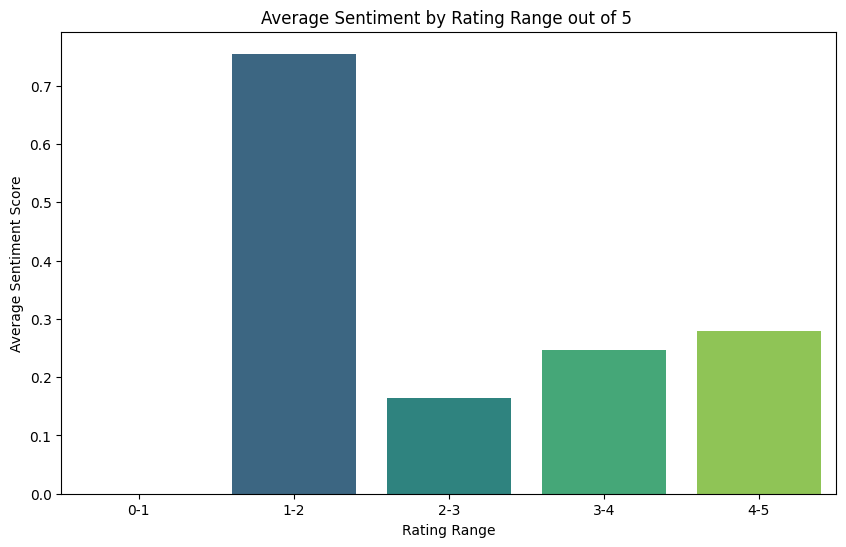

In [ ]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

df_final['rating'] = df_final['rating'].astype(float)
df_final['rating_bin'] = pd.cut(df_final['rating'], bins=bins, labels=labels, include_lowest=True)

avg_sentiment_by_bin = df_final.groupby('rating_bin')['sentiment'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sentiment_by_bin, x='rating_bin', y='sentiment', palette='viridis')
plt.title('Average Sentiment by Rating Range out of 5 ')
plt.xlabel('Rating Range')
plt.ylabel('Average Sentiment Score')
plt.show()

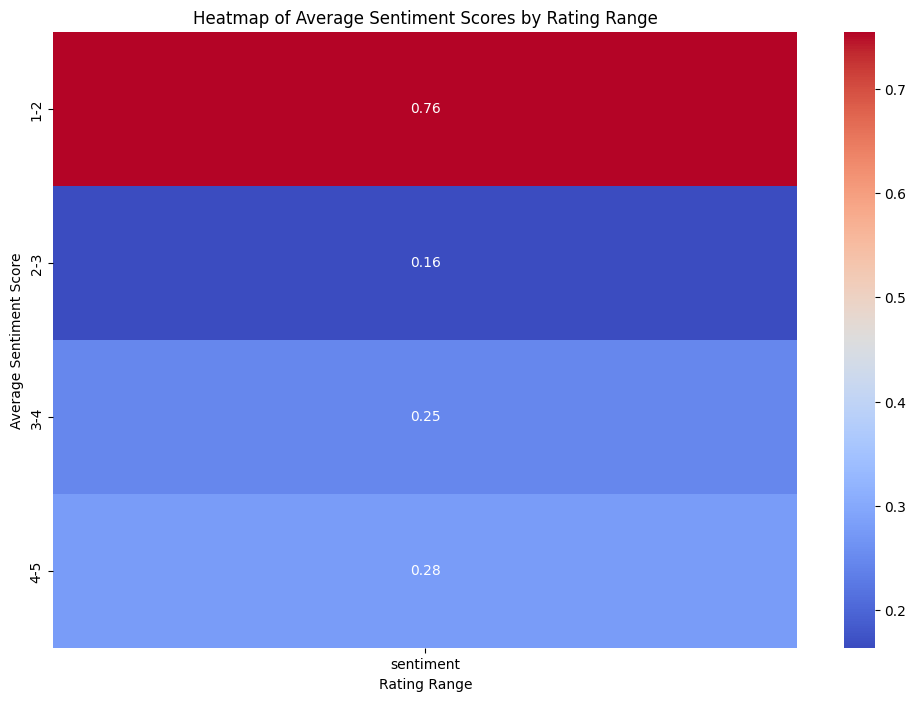

In [ ]:
# Bin the ratings
df_final['rating_bin'] = pd.cut(df_final['rating'], bins=bins, labels=labels, include_lowest=True)

# Create a pivot table for average sentiment score by rating range
pivot_table = df_final.pivot_table(index='rating_bin', values='sentiment', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Average Sentiment Scores by Rating Range')
plt.xlabel('Rating Range')
plt.ylabel('Average Sentiment Score')
plt.show()

sentiment_category
Positive    1368
Negative      25
Name: count, dtype: int64


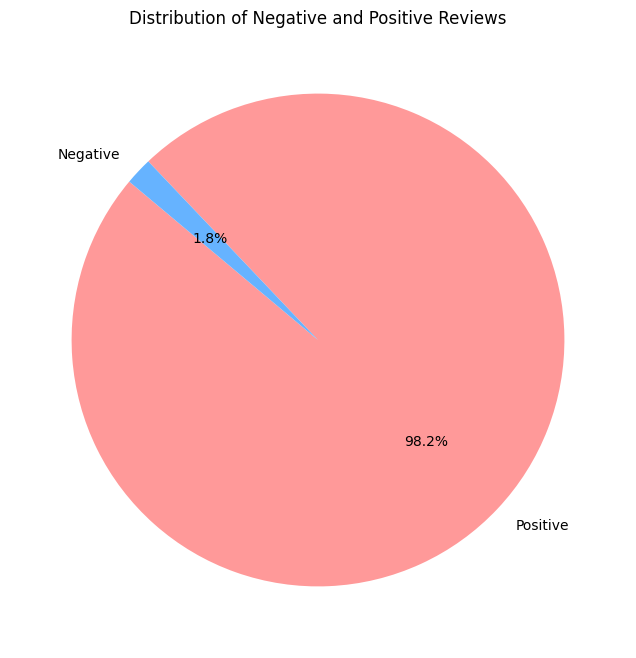

In [ ]:
# Define a threshold for sentiment (e.g., 0.5 as a neutral point)
threshold = 0

# Categorize reviews into negative and positive
df_final['sentiment_category'] = df_final['sentiment'].apply(lambda x: 'Positive' if x >= threshold else 'Negative')

# Count the number of negative and positive reviews
review_counts = df_final['sentiment_category'].value_counts()
print(review_counts)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Distribution of Negative and Positive Reviews')
plt.show()


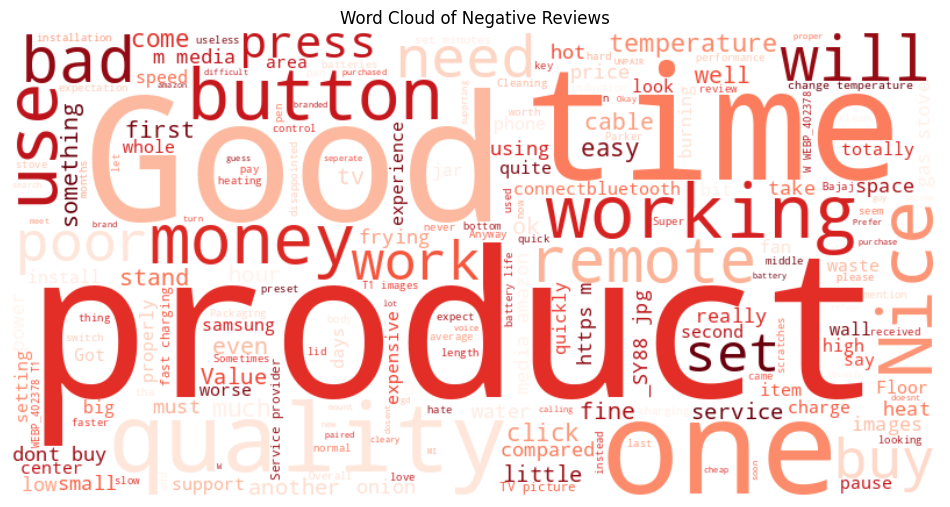

In [ ]:
# Filter negative reviews
negative_reviews = df_final[df_final['sentiment_category'] == 'Negative']
negative_text = ' '.join(negative_reviews['review_content'].dropna())

# Create a word cloud for negative reviews
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

In [ ]:
df_final = df_final.drop(columns=['category_existing', 'category_y'])
df_final.to_csv('cleaned_final_customer_reviews.csv', index=False)